In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [40]:
df_data = pd.read_csv("../Data/preprocessed_alcoholdata_sl.csv")
df_data = df_data.drop("Unnamed: 0", axis=1)
# display(df_data)

In [41]:
chars = ["array([[2]], dtype=uint8", "array", "\n", "[", "]", "(", ")"]

def string_to_ndarray(sd):
    for char in chars:
        sd = sd.replace(char, "")

    sd = sd.replace("   ", " ")
    sd = sd[:-2]

    sd_lst = sd.split(" ")
    sd_lst = [float(i) for i in sd_lst]

    sd_arr = np.asarray(sd_lst)
    sd_arr = np.split(sd_arr, len(sd_arr)/3)
    
    return np.asarray(sd_arr)

#### Adding Standard deviations

In [44]:
stds = []
for index, _ in df_data.iterrows():
    sd = df_data["SegmentData"][i]
    sd_arr = string_to_ndarray(sd)
    std = np.std(sd_arr[:,0])
    stds.append(std)

col = pd.Series(stds)
df_data["std_SegmentData"] = col.values

In [46]:
display(df_data)
df_data.to_csv(path_or_buf="../Data/preprocessed_alcoholdata_sl_std.csv")

,TestID,Conditie,SubjectID,SegmentNr,WalkingDirection,SegmentData,Alcohol,Height,Weight,Age,BMI,AverageStepLength,std_SegmentData
0,006A01',norm,6,1,away,[[array([[0.04697253]]) array([[-0.18321628]])...,0.00,177,70.0,20,22.343516,0.610128,0.065128
1,006A01',norm,6,2,towards,[[array([[0.40771624]]) array([[-0.22044282]])...,0.00,177,70.0,20,22.343516,0.681944,0.065128
2,006A01',norm,6,3,away,[[array([[0.09305737]]) array([[-0.19160482]])...,0.00,177,70.0,20,22.343516,0.713798,0.065128
3,006A01',norm,6,4,towards,[[array([[0.44424376]]) array([[-0.2283845]]) ...,0.00,177,70.0,20,22.343516,0.651639,0.065128
4,009A01',norm,9,1,away,[[array([[-0.08974021]]) array([[-0.0481508]])...,0.00,195,86.0,23,22.616700,0.768314,0.065128
5,009A01',norm,9,2,towards,[[array([[0.47497733]]) array([[-0.09702823]])...,0.00,195,86.0,23,22.616700,0.685495,0.065128
6,009A01',norm,9,3,away,[[array([[0.00489379]]) array([[-0.07232992]])...,0.00,195,86.0,23,22.616700,0.689099,0.065128
7,009A01',norm,9,4,towards,[[array([[0.51498991]]) array([[-0.09675995]])...,0.00,195,86.0,23,22.616700,0.660362,0.065128
8,010A01',norm,10,1,away,[[array([[-0.33516738]]) array([[-0.30029692]]...,0.00,165,65.0,28,23.875115,0.538055,0.065128
9,010A01',norm,10,2,towards,[[array([[0.54318447]]) array([[-0.34777679]])...,0.00,165,65.0,28,23.875115,0.571604,0.065128


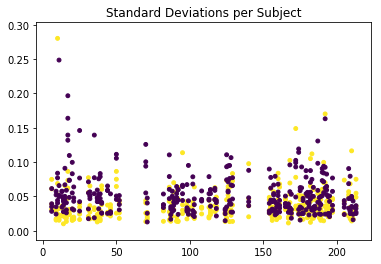

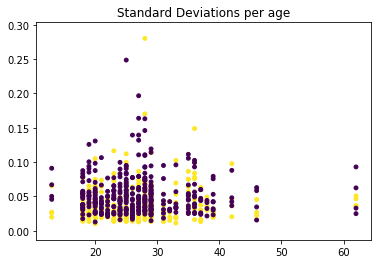

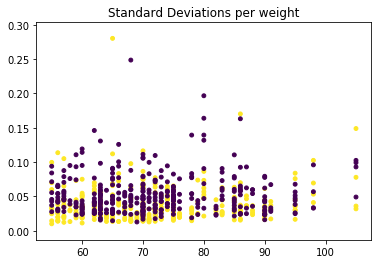

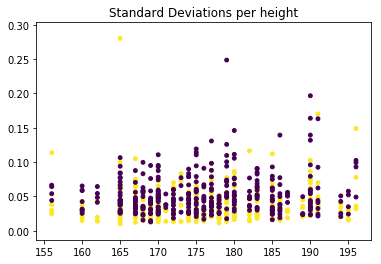

In [37]:
categories = np.unique(df_data["Conditie"])
colors = np.linspace(0, 1, len(categories))
colordict = dict(zip(categories, colors)) 

df_data["Color"] = df_data["Conditie"].apply(lambda x: colordict[x])
plt.scatter(df_data["SubjectID"], df_data["std_SegmentData"], c=df_data.Color, s=15)
plt.title("Standard Deviations per Subject")
plt.show()

plt.scatter(df_data["Age"], df_data["std_SegmentData"], c=df_data.Color, s=15)
plt.title("Standard Deviations per age")
plt.show()

plt.scatter(df_data["Weight"], df_data["std_SegmentData"], c=df_data.Color, s=15)
plt.title("Standard Deviations per weight")
plt.show()

plt.scatter(df_data["Height"], df_data["std_SegmentData"], c=df_data.Color, s=15)
plt.title("Standard Deviations per height")
plt.show()



#### Adding variance

In [26]:
varss = []
for i in range(0, 720):
    sd = df_data["SegmentData"][i]
    sd_arr = string_to_ndarray(sd)
    var = np.var(sd_arr[:,0])
    varss.append(var)

col = pd.Series(varss)
df_data["var_SegmentData"] = col.values

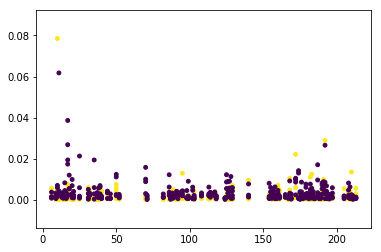

In [27]:
categories = np.unique(df_data["Conditie"])
colors = np.linspace(0, 1, len(categories))
colordict = dict(zip(categories, colors)) 

df_data["Color"] = df_data["Conditie"].apply(lambda x: colordict[x])
plt.scatter(df_data["SubjectID"], df_data["var_SegmentData"], c=df_data.Color, s=15)
plt.show()

In [89]:
# mean std of norm
stds = []
for i in range(0, 360):
    sd = df_data["SegmentData"][i]
    sd_arr = string_to_ndarray(sd)
    std = np.std(sd_arr[:,0])
    stds.append(std)
    
print(np.mean(stds))

0.03705270416192119


In [85]:
# mean std of bril
stds = []
for i in range(360, 720):
    sd = df_data["SegmentData"][i]
    sd_arr = string_to_ndarray(sd)
    std = np.std(sd_arr[:,0])
    stds.append(std)
    
print(np.mean(stds))

0.05215266133590558
